In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

import torch
from torch.utils.data import DataLoader

from nerf_model import NerfModel
from nerf_dataset import LegoDataset
from nerf_utils import *

In [2]:
device = torch.device("cuda")
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080'

In [3]:
NUM_OF_EPOCHS = 250
NEW_IMAGE_SIZE = 64

SIZE_OF_CHUNK = 64
NUM_OF_CHUNKS = 64 // SIZE_OF_CHUNK
# assert NUM_OF_CHUNKS * SIZE_OF_CHUNK == 800

LEARNING_RATE = 5e-4
BATCH_SIZE = 1

In [4]:
dataset = LegoDataset(new_image_size=NEW_IMAGE_SIZE)

dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=8)
model = NerfModel().to(device)

In [5]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9999769744)
loss = torch.nn.MSELoss()

In [6]:
for e in range(NUM_OF_EPOCHS):
    print("EPOCH: ", e)
    t, d = stratified_sampling()
    for img, cam_2_world in tqdm(dataloader):
        img = img.squeeze().to(device)
        cam_2_world = cam_2_world.squeeze().to(device)
        
        rays_o, rays_d = get_rays(cam_2_world, width=64, height=64)
        rays_o, rays_d = rays_o.to(device), rays_d.to(device)
        rays_o = rays_o.unsqueeze(-1).expand(*rays_o.shape, t.shape[0])
        rays_d = rays_d.unsqueeze(-1).expand(*rays_d.shape, t.shape[0])
        ray_positions = rays_o + rays_d * t

        for c in range(NUM_OF_CHUNKS):
            color, sigma = model(
                ray_positions[:, c * SIZE_OF_CHUNK:(c+1) * SIZE_OF_CHUNK, :], 
                rays_d[:, c * SIZE_OF_CHUNK:(c+1) * SIZE_OF_CHUNK, :], 
            )
            color = color.permute(3, 0, 1, 2)
            alpha = 1 - torch.exp(-sigma * d)
            # We need torch.cumprod to be exclusive
            x = torch.sum(
                torch.cumprod(1 - alpha, dim=-1) / (1 - alpha + 1e-10) * \
                    alpha * \
                    color,
                dim=-1
            )
            ground_truth = img[:, c * SIZE_OF_CHUNK:(c+1) * SIZE_OF_CHUNK, :] #.permute(2, 0, 1)
            l = loss(x, ground_truth)
            l.backward()
        optimizer.step()
        scheduler.step()            
        optimizer.zero_grad()

EPOCH:  0


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


EPOCH:  1


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


EPOCH:  2


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


EPOCH:  3


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  4


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  5


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  6


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  7


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  8


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  9


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  10


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  11


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  12


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  13


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  14


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  15


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  16


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  17


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  18


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  19


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  20


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  21


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  22


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  23


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  24


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  25


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  26


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  27


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  28


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  29


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  30


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  31


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  32


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  33


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  34


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  35


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  36


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  37


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  38


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  39


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  40


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  41


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  42


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  43


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  44


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  45


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  46


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  47


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  48


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  49


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  50


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  51


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  52


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  53


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  54


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  55


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  56


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  57


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  58


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  59


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  60


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  61


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  62


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  63


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  64


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  65


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  66


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  67


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  68


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  69


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  70


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  71


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  72


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  73


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  74


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  75


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  76


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  77


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  78


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  79


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  80


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  81


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  82


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  83


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  84


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  85


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  86


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  87


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  88


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  89


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  90


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  91


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


EPOCH:  92


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  93


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  94


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  95


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  96


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  97


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  98


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  99


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  100


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  101


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]


EPOCH:  102


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  103


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  104


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  105


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  106


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  107


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  108


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  109


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  110


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  111


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  112


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  113


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  114


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  115


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  116


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  117


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  118


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  119


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  120


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  121


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  122


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  123


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  124


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  125


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  126


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  127


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  128


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  129


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  130


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  131


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  132


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  133


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  134


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  135


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  136


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  137


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  138


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  139


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  140


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  141


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  142


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  143


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  144


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  145


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  146


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  147


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  148


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  149


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  150


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  151


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  152


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  153


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


EPOCH:  154


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  155


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  156


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  157


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  158


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  159


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  160


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  161


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  162


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  163


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  164


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  165


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  166


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  167


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  168


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  169


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  170


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  171


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  172


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  173


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  174


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  175


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  176


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  177


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  178


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  179


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  180


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  181


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  182


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  183


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  184


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  185


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  186


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  187


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  188


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  189


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  190


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  191


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  192


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  193


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  194


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  195


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  196


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  197


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  198


100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


EPOCH:  199


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  200


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  201


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  202


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  203


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  204


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  205


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  206


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  207


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  208


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  209


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  210


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  211


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  212


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  213


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  214


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  215


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


EPOCH:  216


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  217


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


EPOCH:  218


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  219


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  220


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  221


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  222


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  223


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  224


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  225


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  226


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  227


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  228


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  229


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  230


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  231


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  232


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  233


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  234


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  235


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  236


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  237


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  238


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  239


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  240


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


EPOCH:  241


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  242


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  243


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  244


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


EPOCH:  245


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  246


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


EPOCH:  247


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  248


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


EPOCH:  249


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


In [7]:
# torch.save(model.state_dict(), "./hi.pt")

C:\Users\Sourish\AppData\Local\Temp\ipykernel_25760\3330669332.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


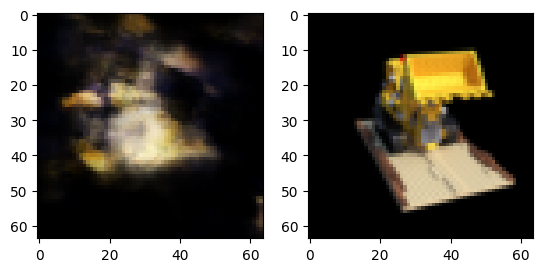

In [18]:
def run_test(index=0, split='train'):
  with torch.no_grad():
    new_model = NerfModel().to(device)
    new_model.load_state_dict(torch.load("./hi.pt", map_location="cuda"))

    dataset = LegoDataset(split=split, new_image_size=NEW_IMAGE_SIZE)
    image, cam_2_world = dataset[index]
    image = image.to(device)
    cam_2_world = cam_2_world.to(device)

    t, d = stratified_sampling()
    rays_o, rays_d = get_rays(cam_2_world, width=NEW_IMAGE_SIZE, height=NEW_IMAGE_SIZE)

    rays_o = rays_o.unsqueeze(-1).expand(*rays_o.shape, t.shape[0])
    rays_d = rays_d.unsqueeze(-1).expand(*rays_d.shape, t.shape[0])
    ray_positions = rays_o + rays_d * t

    color, sigma = new_model(
        ray_positions, 
        rays_d, 
    )

    color = color.permute(3, 0, 1, 2)
    alpha = 1 - torch.exp(-sigma * d)

    transmittance = torch.cumprod(1 - alpha, dim=-1) / (1 - alpha + 1e-10)
    x = torch.sum(transmittance * alpha * color, dim=-1).permute(1, 2, 0)

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(x.cpu().numpy())
    ax[1].imshow(image.cpu().numpy().transpose(1, 2, 0))
    fig.show()

run_test(144, split='test')
  
